In [6]:
import pandas as pd

# Load CSV file
df = pd.read_csv("/workspaces/datamining/Gym Members Exercise/gym_members_exercise_tracking.csv")

# Standardizing column names
df.columns = df.columns.str.replace(" ", "_").str.lower()

# Convert categorical variables
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['workout_type'] = df['workout_type'].astype("category").cat.codes

# Handle outliers using the 5th and 95th percentiles
for col in ["weight_(kg)", "height_(m)"]:
    lower_bound = df[col].quantile(0.05)
    upper_bound = df[col].quantile(0.95)
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Print cleaned data
df.head()


,age,gender,weight_(kg),height_(m),max_bpm,avg_bpm,resting_bpm,session_duration_(hours),calories_burned,workout_type,fat_percentage,water_intake_(liters),workout_frequency_(days/week),experience_level,bmi
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


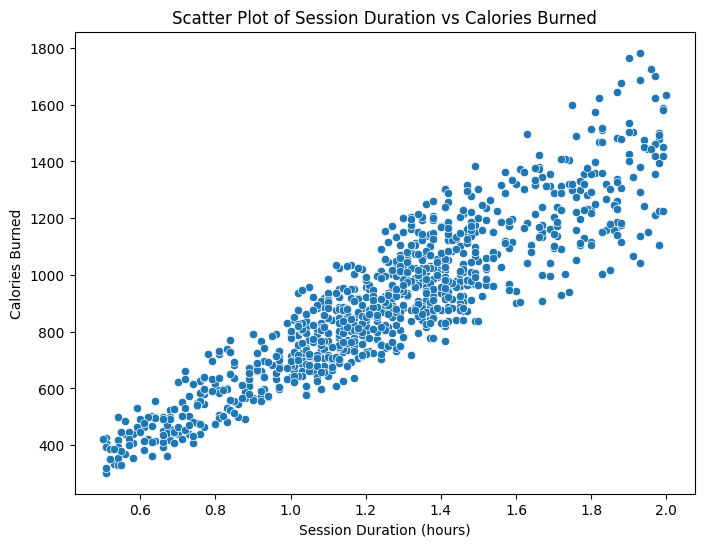

{'Correlation Coefficient': np.float64(0.9081403755270122), 'P-Value': np.float64(0.0)}


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Scatter plot between session duration and calories burned
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['session_duration_(hours)'], y=df['calories_burned'])
plt.xlabel("Session Duration (hours)")
plt.ylabel("Calories Burned")
plt.title("Scatter Plot of Session Duration vs Calories Burned")
plt.show()

# Calculate correlation between session duration and calories burned
session_correlation_results = calculate_correlation('session_duration_(hours)', 'calories_burned')
print(session_correlation_results)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Selecting features and target variable
X = df[['age', 'gender', 'weight_(kg)', 'height_(m)', 'max_bpm', 'avg_bpm',
        'resting_bpm', 'session_duration_(hours)', 'calories_burned',
        'fat_percentage', 'water_intake_(liters)', 'workout_frequency_(days/week)', 'bmi']]
y = df['workout_type']  # Target: workout type

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Choosing k=5
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.22
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.33      0.26        46
           1       0.16      0.19      0.17        42
           2       0.17      0.17      0.17        47
           3       0.39      0.18      0.25        60

    accuracy                           0.22       195
   macro avg       0.23      0.22      0.21       195
weighted avg       0.25      0.22      0.22       195

